# Clase 5, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. 3 de Mayo 2024.

## Pandas

En esta clase vamos a trabajar con Pandas, que es una biblioteca opensource para manipulación y análisis de datos basada en Numpy, ofrece estructuras y operaciones para manejo de tablas numéricas.</br>
Un DataFrame es una estructura de datos relacional, es decir, se asemeja a una planilla de cálculo con columnas y filas indexadas.</br>
Para trabajar con mucha información, a veces termina siendo conveniente trabajar con una tabla en lugar de varios arreglos como hicimos hasta el momento, ya sea para presentarla prolijamente o exportarla a un archivo de texto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para nuestro ejemplo, supongamos que la posición de una partícula responde a la siguiente ecuación horaria:</br>

$x(t)= cos(at) + bt^5 +ct^4$</br>

donde</br>
$a = 0.2 \mathrm{s}^{-1}$</br>
$b = 0.95 \times 10^{-8}\mathrm{m}$</br>
$c = -10^{-6} \mathrm{m}$


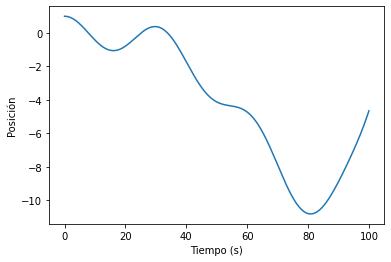

In [2]:
a = 0.2
b = 0.95e-8
c = -1e-6

def x(t):
    return np.cos(a*t) + b*t**5 + c*t**4

#invento un intervalo de tiempo
h = 0.1
t = np.arange(0,100,h)

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.plot(t,x(t))

### Como convierto mis arreglos en un solo dataframe?

In [3]:
#Veamos que al imprimir nuestros arreglos, estos se encuentran en 'linea horizontal'
print('posicion')
print(x(t)[0:20])

posicion
[1.         0.99980001 0.99920011 0.99820053 0.99680168 0.9950041
 0.99280851 0.99021576 0.98722688 0.98384304 0.98006559 0.975896
 0.97133592 0.96638716 0.96105165 0.9553315  0.94922896 0.94274645
 0.93588651 0.92865184]


In [4]:
#Nosotros necesitamos pivotearlos para convertirlos en una tabla,  para tal fin, vamos a utilizar la función Transpose.
data = np.transpose([x(t),t])
print(data)

[[ 1.          0.        ]
 [ 0.99980001  0.1       ]
 [ 0.99920011  0.2       ]
 ...
 [-4.75977323 99.7       ]
 [-4.70434068 99.8       ]
 [-4.64839241 99.9       ]]


In [5]:
#y le damos nombres a las columnas de nuestro futuro dataframe dentro de una lista
columns = ['posicion','tiempo']
# para crear nuestro dataframe, al cual le pasaremos como parámetros  el arreglo transpuesto y el nombre de las columnas usamos la función DataFrame
df = pd.DataFrame(data, columns = columns)

print(df)

     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


Otra manera de hacer lo mismo

In [6]:
# y si se dan un poco de maña, podemos omitir todo lo anterior y hacer lo mismo rápidamente de la siguiente manera 
df_2 =  pd.DataFrame({
        'posicion': x(t) ,
        'tiempo': t
        })
print(df_2)


     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


In [7]:
#para ver aproximadamente como se distribuyen los valores numérivos dentro de un DataFrame (omite otros tipos de dato), podemos llamar a la función
df.describe()

,posicion,tiempo
count,1000.000000,1000.000000
mean,-4.118219,49.950000
std,3.826838,28.881944
min,-10.805177,0.000000
25%,-7.404655,24.975000
50%,-4.115537,49.950000
75%,-0.531076,74.925000
max,1.000000,99.900000


Ahora bien... Cómo ploteo la info en un DataFrame?

In [8]:
# para traerme solo una columna del dataframe, basta con castear el nombre de la columna entre corchetes
print(df['posicion'])

0      1.000000
1      0.999800
2      0.999200
3      0.998201
4      0.996802
         ...   
995   -4.869133
996   -4.814700
997   -4.759773
998   -4.704341
999   -4.648392
Name: posicion, Length: 1000, dtype: float64


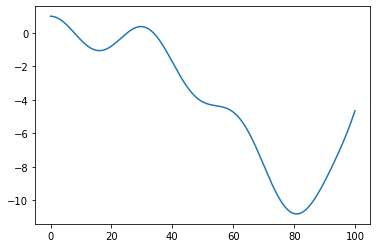

In [9]:
# para plotear el gráfico que obtuvimos inicialmente entonces:
plt.plot(df['tiempo'],df['posicion'])

Como obtengo los valores dado un índice?

In [10]:
#de manera similar a numpy, si quiero obtener el valor en un índice dado, por ejemplo, el valor de la posición para la 4ta fila:
df['posicion'][3]

0.9982005318582892

Al mismo tiempo, permite guardar la info en distintos formatos, por simplicidad, usaremos csv y dejaremos el archivo en el directorio donde nuestro código se encuentra alojado

In [11]:
#la función recibe como parámetro el directorio a dejar el archivo, y si queremos o no que las filas conserven el indice, es decir, que se guarde en otra columna
nombre_archivo = './clase5_data_ejemplo.csv'
df.to_csv(nombre_archivo, index=False)

Para levantar un archivo el procedimiento es muy similar

In [12]:
df_4= pd.read_csv(nombre_archivo)
df_4.head()

,posicion,tiempo
0,1.000000,0.0
1,0.999800,0.1
2,0.999200,0.2
3,0.998201,0.3
4,0.996802,0.4


In [13]:
#para borrar el archivo
import os
os.remove(nombre_archivo)

### Cómo guardo el resultado de una operación en una columna?
Para crear una nueva columna, basta con asignarle un nombre y a qué operación corresponde:

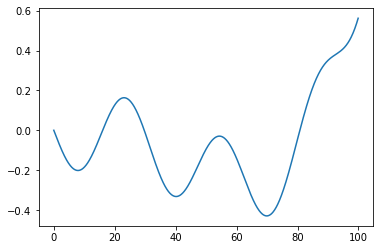

In [14]:
def derivada(t):
    return   ( x(t+h) - x(t-h) ) / (2*h)

df['velocidad'] = derivada( df['tiempo'] )

plt.plot(df['tiempo'],df['velocidad'])


## Consigna 1:
La posición de una masa enganchada a un resorte responde a la ecuación de oscilación amortiguada: <br>
$ x(t) = 0.0502 e^{-t} \cos{(9.95 t - 0.0997)}$<br>
Crear un dataframe pandas con la posición y el tiempo de la masa<br>
Agregar dos columnas: con el resultado obtenido de determinar su velocidad y su aceleración <br>
Plotear un gráfico con la velocidad en función del tiempo.

# Clase 6: Filtrado y agrupado

#### Pandas permite filtrar los datos, para hacer esto usaremos la funcion $loc$ </br> 

sintaxis:</br>
DataFrame.loc[ (condicion 1) ]</br>

operador AND: </br>
DataFrame.loc[  (condicion 1) &  (condicion 2) ]</br>

operador OR:</br>
DataFrame.loc[  (condicion 1) | (condicion 2) ]</br>

para buscar multiples valores
DataFrame.loc[  (DataFrame[columna].isin([lista])) ]</br>

In [15]:
#levantamos el set de datos
df_temperaturas = pd.read_csv(r'C:\Users\Daiana\OneDrive - inspt.utn.edu.ar\INSPT\Computacion 3\recursos\recursos tp compu 3 - pandas\serie_tiempo_temperaturas.csv')

In [16]:
#y le pegamos una miradita para ver de que se trata
df_temperaturas.head()

,Year,Country,City,AvgTemperature
0,1995,Argentina,Buenos Aires,61.701370
1,1995,Bahamas,Nassau,76.628493
2,1995,Barbados,Bridgetown,80.766849
3,1995,Belize,Belize City,-44.337190
4,1995,Bermuda,Hamilton,69.420548


In [17]:
#Suponiendo que quiero otro dataframe que contenta solo los valores de temperatura positivos, solo de Argentina
df_3 = df_temperaturas.loc[ (df_temperaturas['Country'] == 'Argentina') & (df_temperaturas['AvgTemperature'] >0.0) ]
df_3

,Year,Country,City,AvgTemperature
0,1995,Argentina,Buenos Aires,61.701370
25,1996,Argentina,Buenos Aires,62.710109
50,1997,Argentina,Buenos Aires,63.143836
75,1998,Argentina,Buenos Aires,59.558904
100,1999,Argentina,Buenos Aires,61.395068
125,2000,Argentina,Buenos Aires,61.955191
150,2001,Argentina,Buenos Aires,62.895068
175,2002,Argentina,Buenos Aires,60.787397
200,2003,Argentina,Buenos Aires,61.042466
225,2004,Argentina,Buenos Aires,62.625956


### cómo agrupo la información?
Ahora,nuestro dataframe está desagregado en varias columnas, por ejemplo año, país, temperatura promedio. Y nosotros queremos plotear la temperatura promedio por país.

In [18]:
#si quisiera por ejemplo ver los distintos valores que puede tomar un campo string
df_temperaturas.Country.unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Equador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Nicaragua',
       'Panama', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'], dtype=object)

In [19]:
#para traerme por ejemplo los datos de Colombia y Ecuador, que son caracteres y no numeros,  puedo filtrarlos como
paises=['Colombia','Equador']
df_temperaturas.loc[df_temperaturas['Country'].isin(paises)].head()

,Year,Country,City,AvgTemperature
9,1995,Colombia,Bogota,54.963014
13,1995,Equador,Guayaquil,68.973425
14,1995,Equador,Quito,49.736712
34,1996,Colombia,Bogota,55.083333
38,1996,Equador,Guayaquil,50.576230


A veces para ver gráficamente la información que tenemos en un dataframe, más que un gráfico de lineas nos sirve un diagrama de dispersión, también llamado scatter plot. 

c:\Users\Daiana\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


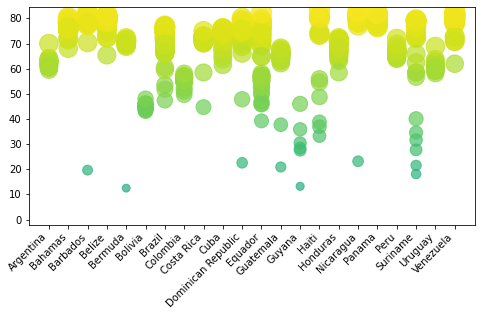

In [20]:
fig = plt.figure(figsize=(8, 4))# tamaño de la figura
plt.ylim(-2, max(df_temperaturas['AvgTemperature'])) # limite del eje y:  desde y hasta
plt.xticks(rotation=45, ha='right') # giro 45 grados las etiquetas del eje x para que no se me encimen

plt.scatter(df_temperaturas['Country'], #eje x
            df_temperaturas['AvgTemperature'], #eje y 
            s = df_temperaturas['AvgTemperature']*5, # s : size
            c =df_temperaturas['AvgTemperature'], # c : color
            alpha = 0.7 ) # alpha : opacidad del color

la sintaxis para agrupar por un campo un dataframe es:

df.groupby( ['NombreColumnaAgrupadora'] )[ 'Metrica' ].agrupador()

In [21]:
#por ejemplo, el promedio de las temperaturas por país
df_temp_agrup = df_temperaturas.groupby(['Country'])['AvgTemperature'].mean().reset_index(name='Temperature')
df_temp_agrup.head()

,Country,Temperature
0,Argentina,62.491706
1,Bahamas,76.549409
2,Barbados,77.023420
3,Belize,73.630746
4,Bermuda,67.034401


# Consigna 2:
Levantar el archivo del campus virtual llamado serie_tiempo_temperatura.csv<br>
Hacer un paneo general del dataset para ver el nombre de las columnas y de qué se trata la información, de ser necesario, considerar una conversión de unidades.<br>
Con el dataframe inicial, crear un scatter plot para ver a distribución de la temperatura Argentina y los países vecinos que contenga el dataset <br>
Por otro lado, y con todo lo aprendido, plotear en el mismo gráfico la temperatura máxima y mínima alcanzada cada año.<br>
(pssss: consideren ir creando otros dataframe temporales agrupando y filtrando las columnas que necesite, analizando previamente qué valores únicos contiene.)<br>
